# Arima_Timeseries

Use the "Run" button to execute the code.

In [ ]:
#!pip install jovian --upgrade --quiet

In [ ]:
#import jovian

In [ ]:
# Execute this to save new versions of the notebook
#jovian.commit(project="arima-timeseries")

<IPython.core.display.Javascript object>

In [1]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.6 MB/s eta 0:00:00


In [2]:
pip show statsmodels

Name: statsmodels
Version: 0.14.4
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: 
Author-email: 
License: BSD License
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, packaging, pandas, patsy, scipy
Required-by: plotnine, pmdarima


In [3]:
from sklearn.metrics import mean_absolute_error

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from pandas import DataFrame
import pathlib
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.api import SimpleExpSmoothing,Holt,ExponentialSmoothing,acf, graphics, pacf,SARIMAX
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.deterministic import DeterministicProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.seasonal import STL,seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
import pmdarima as pm
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from typing import Type

In [5]:

sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(16, 6))

In [14]:
import openpyxl
print(openpyxl.__version__)

3.1.5


In [15]:
import requests
import pandas as pd
import io

url = 'https://github.com/kaustavkeynes/time_series/blob/main/exchange_rate.xlsx?raw=true'
response = requests.get(url)

exchangerate_df = pd.read_excel(io.BytesIO(response.content), engine='openpyxl')
exchangerate_df

,Time_Period,exchange_rate
0,2000-01-01,43.550000
1,2000-01-02,43.550000
2,2000-01-03,43.550000
3,2000-01-04,43.550000
4,2000-01-05,43.550000
...,...,...
8084,2022-02-18,74.557425
8085,2022-02-19,74.557425
8086,2022-02-20,74.557425
8087,2022-02-21,74.684248


In [16]:
exchangerate_df.describe()

,Time_Period,exchange_rate
count,8089,8089.000000
mean,2011-01-27 00:00:00,54.836117
min,2000-01-01 00:00:00,39.068991
25%,2005-07-15 00:00:00,45.504872
50%,2011-01-27 00:00:00,48.815006
75%,2016-08-10 00:00:00,65.184983
max,2022-02-22 00:00:00,76.936422
std,NaN,11.166238


In [17]:
exchangerate_df

,Time_Period,exchange_rate
0,2000-01-01,43.550000
1,2000-01-02,43.550000
2,2000-01-03,43.550000
3,2000-01-04,43.550000
4,2000-01-05,43.550000
...,...,...
8084,2022-02-18,74.557425
8085,2022-02-19,74.557425
8086,2022-02-20,74.557425
8087,2022-02-21,74.684248


In [18]:
exchangerate_df['exchange_rate'].index = pd.date_range("01-01-2000","22-02-2022",freq='D')

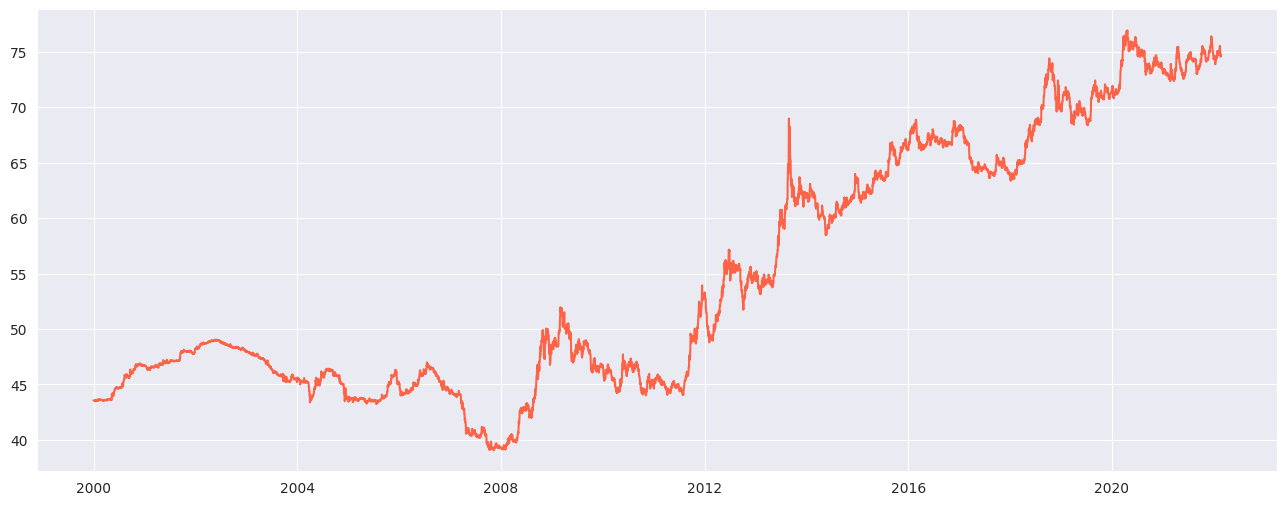

In [19]:
plt.plot(exchangerate_df['exchange_rate'],color= 'tomato')


**Original Series**

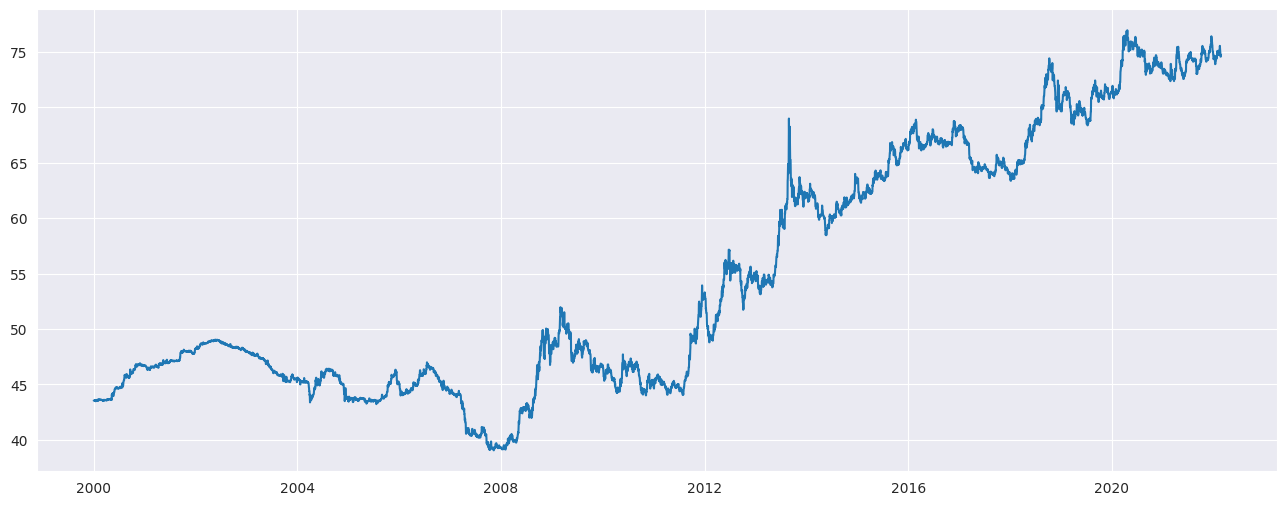

In [20]:
plt.plot(exchangerate_df.exchange_rate)
plt.show()

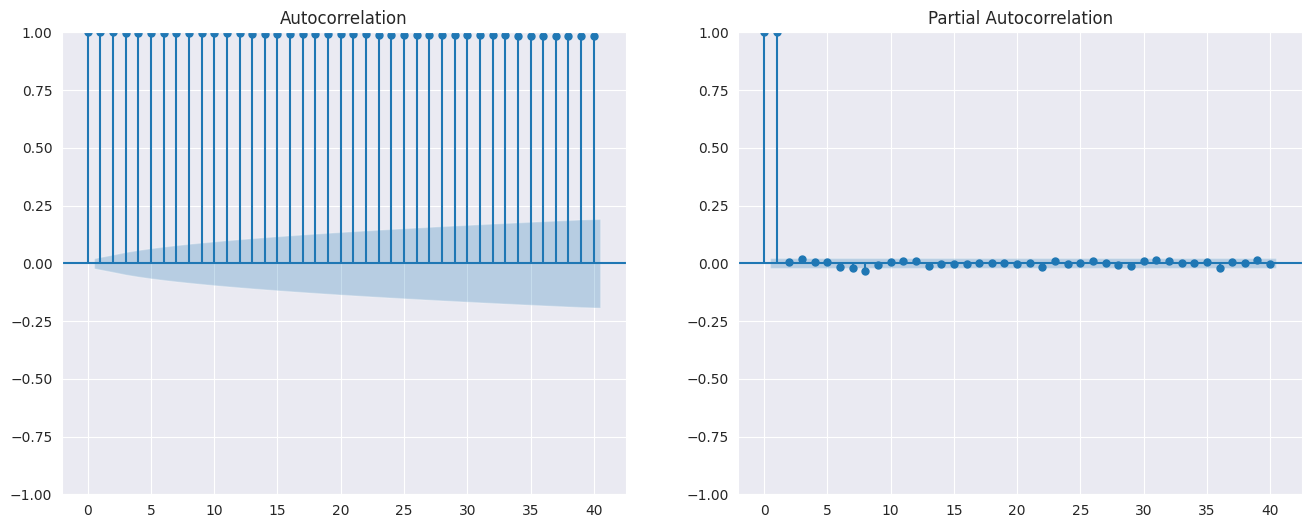

In [21]:
fig, axes = plt.subplots(1, 2)

fig = sm.graphics.tsa.plot_acf(exchangerate_df.exchange_rate, lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(exchangerate_df.exchange_rate, lags=40, ax=axes[1])

In [22]:
adftest = adfuller(exchangerate_df.exchange_rate,autolag="AIC")
print('ADF Statistic: %f' % adftest[0])
print('p-value: %f' % adftest[1])

ADF Statistic: -0.152764
p-value: 0.943923


In [23]:
kpsstest = kpss(exchangerate_df.exchange_rate, regression="c", nlags="auto")
print('KPSS Statistic: %f' % kpsstest[0])
print('p-value: %f' % kpsstest[1])

KPSS Statistic: 12.453170
p-value: 0.010000


In [24]:
t = np.arange(1,8090)
exchangerate_df.insert(2,"Time",t)

In [25]:
exchangerate_df

,Time_Period,exchange_rate,Time
0,2000-01-01,43.550000,1
1,2000-01-02,43.550000,2
2,2000-01-03,43.550000,3
3,2000-01-04,43.550000,4
4,2000-01-05,43.550000,5
...,...,...,...
8084,2022-02-18,74.557425,8085
8085,2022-02-19,74.557425,8086
8086,2022-02-20,74.557425,8087
8087,2022-02-21,74.684248,8088


In [30]:
exchangerate_df['Time_Period'] = pd.to_datetime(exchangerate_df['Time_Period'])  # Convert 'date' column to datetime
exchangerate_df = exchangerate_df.set_index('Time_Period') # Set 'date' column as index
monthly_exchange_rate = exchangerate_df['exchange_rate'].resample('M').mean()

In [31]:
monthly_exchange_rate

,exchange_rate
Time_Period,
2000-01-31,43.559093
2000-02-29,43.620664
2000-03-31,43.577663
2000-04-30,43.644961
2000-05-31,44.020358
...,...
2021-10-31,74.891071
2021-11-30,74.467604
2021-12-31,75.376876


Text(0, 0.5, 'Monthly Exchange Rate (Rupee/Dollar)')

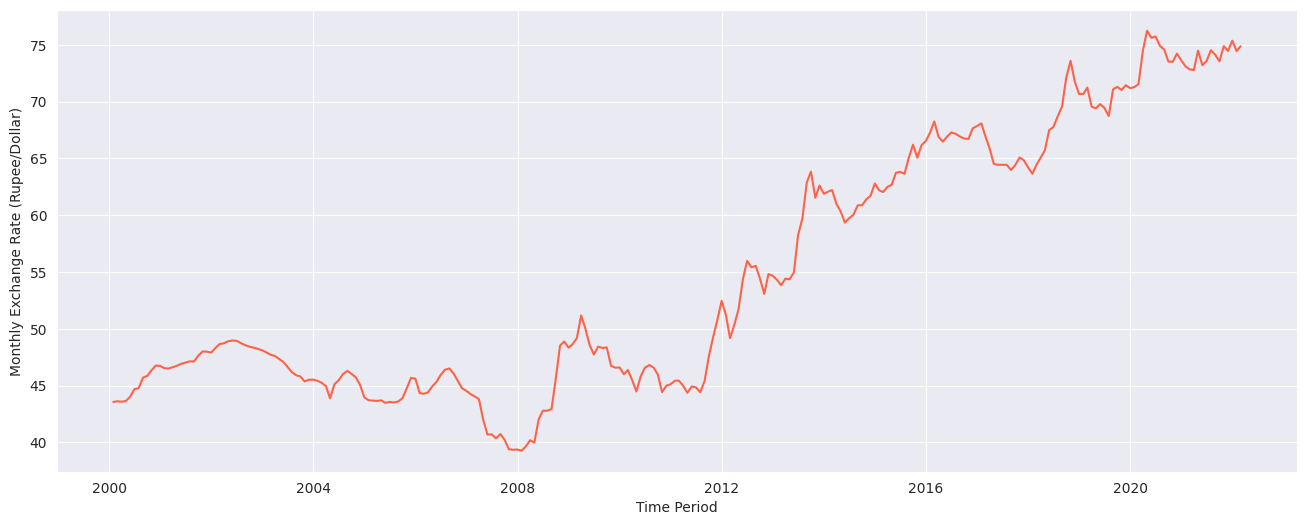

In [32]:

plt.plot(monthly_exchange_rate,color= 'tomato')
plt.xlabel("Time Period")
plt.ylabel("Monthly Exchange Rate (Rupee/Dollar)")

In [33]:
exchangerate_df['D_exchange_rate']=exchangerate_df['exchange_rate'].diff()

In [34]:
exchangerate_df['D_exchange_rate']

,D_exchange_rate
Time_Period,
2000-01-01,NaN
2000-01-02,0.000000
2000-01-03,0.000000
2000-01-04,0.000000
2000-01-05,0.000000
...,...
2022-02-18,-0.458846
2022-02-19,0.000000
2022-02-20,0.000000


<Axes: xlabel='Time_Period'>

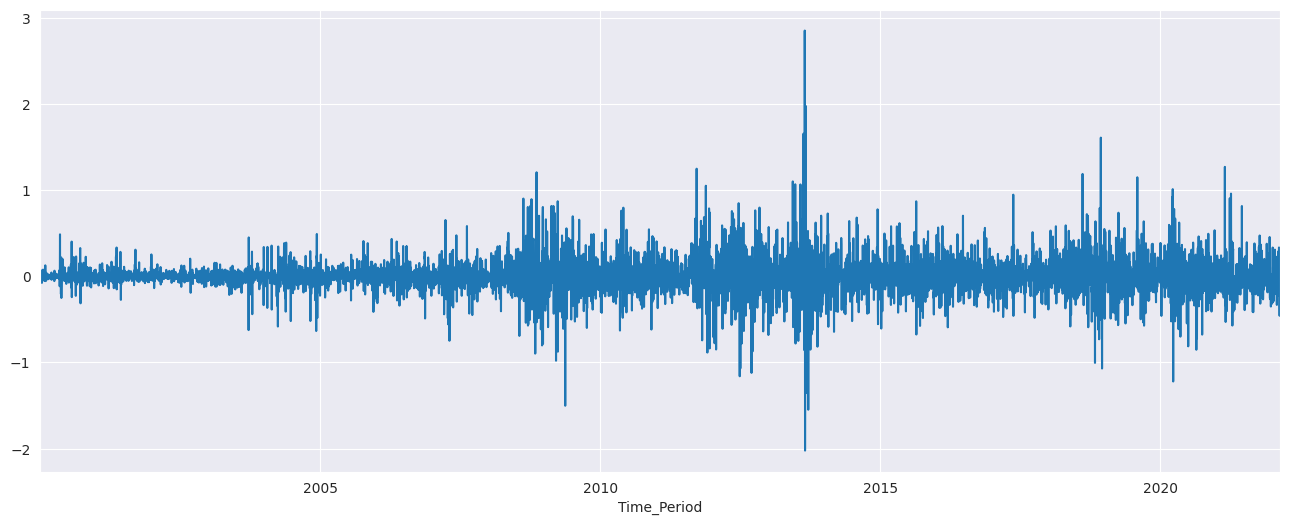

In [35]:
exchangerate_df['D_exchange_rate'].dropna().plot()

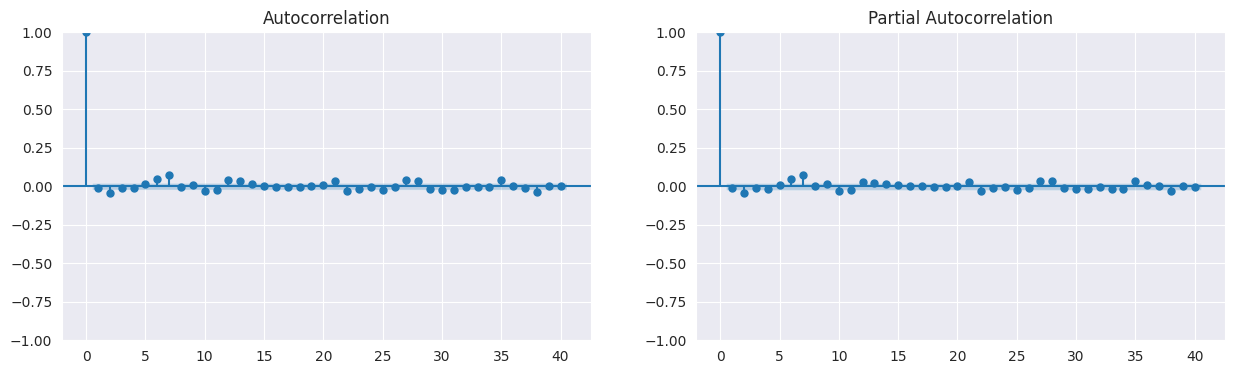

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(exchangerate_df.D_exchange_rate.dropna(), lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(exchangerate_df.D_exchange_rate.dropna(), lags=40, ax=axes[1])

In [37]:
adftest1 = adfuller(exchangerate_df.D_exchange_rate.dropna(),autolag="AIC")
print('ADF Statistic: %f' % adftest1[0])
print('p-value: %f' % adftest1[1])

ADF Statistic: -14.957824
p-value: 0.000000


In [38]:
kpsstest1 = kpss(exchangerate_df.D_exchange_rate.dropna(), regression="c", nlags="auto")
print('KPSS Statistic: %f' % kpsstest1[0])
print('p-value: %f' % kpsstest1[1])

KPSS Statistic: 0.145652
p-value: 0.100000


In [39]:
exchangerate_df['ln_exchangerate'] = np.log(exchangerate_df['exchange_rate'])
exchangerate_df['D.ln_exchangerate'] = exchangerate_df['ln_exchangerate'].diff()

In [40]:
exchangerate_df['D.7.D_exchange_rate']=exchangerate_df['D_exchange_rate'].diff(7)

In [41]:
exchangerate_df

,exchange_rate,Time,D_exchange_rate,ln_exchangerate,D.ln_exchangerate,D.7.D_exchange_rate
Time_Period,,,,,,
2000-01-01,43.550000,1,NaN,3.773910,NaN,NaN
2000-01-02,43.550000,2,0.000000,3.773910,0.000000,NaN
2000-01-03,43.550000,3,0.000000,3.773910,0.000000,NaN
2000-01-04,43.550000,4,0.000000,3.773910,0.000000,NaN
2000-01-05,43.550000,5,0.000000,3.773910,0.000000,NaN
...,...,...,...,...,...,...
2022-02-18,74.557425,8085,-0.458846,4.311570,-0.006135,-0.530212
2022-02-19,74.557425,8086,0.000000,4.311570,0.000000,0.000000
2022-02-20,74.557425,8087,0.000000,4.311570,0.000000,0.000000


<Axes: xlabel='Time_Period'>

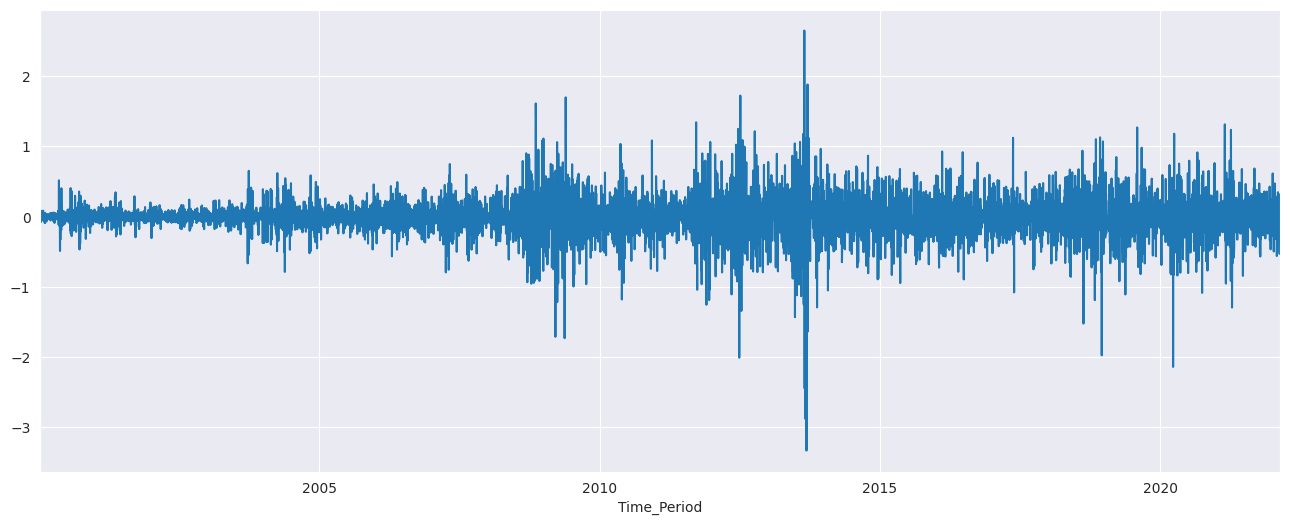

In [42]:
exchangerate_df['D.7.D_exchange_rate'].dropna().plot()

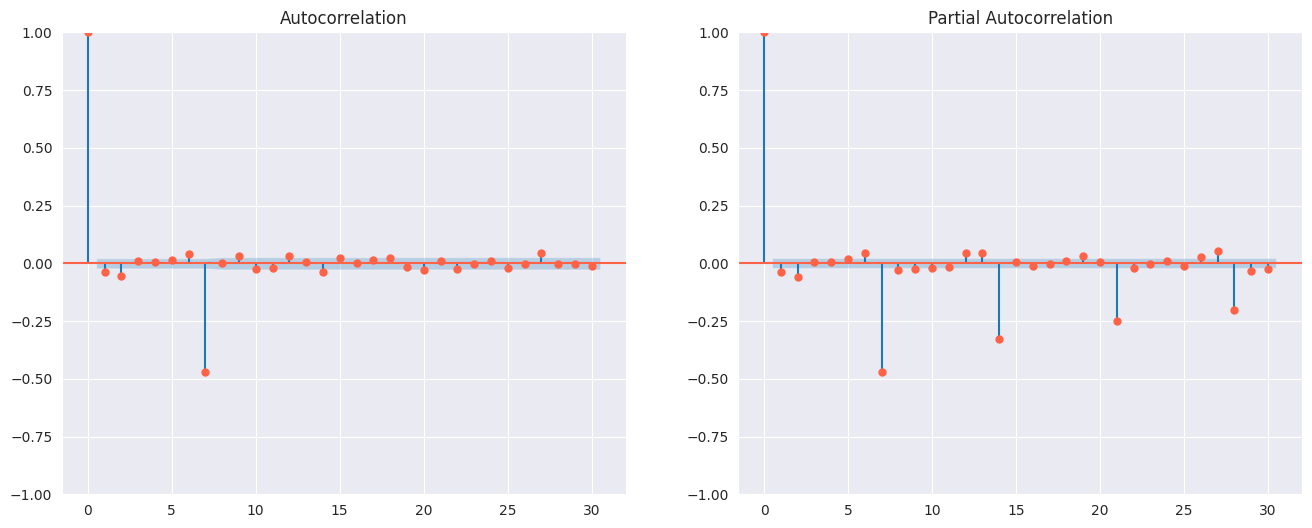

In [43]:
fig, axes = plt.subplots(1, 2)

fig = sm.graphics.tsa.plot_acf(exchangerate_df['D.7.D_exchange_rate'].dropna(), lags=30, ax=axes[0],color= 'tomato')
fig = sm.graphics.tsa.plot_pacf(exchangerate_df['D.7.D_exchange_rate'].dropna(), lags=30, ax=axes[1],color= 'tomato')

In [ ]:
np.mean(residuals**2)

order      pmse
=(2,1,2)  0.270635
   (2 1 0) (1 1 0) 12        0.054452
   (2 1 2) (1 0 1) 7        0.036246
   

Monthly data analysis

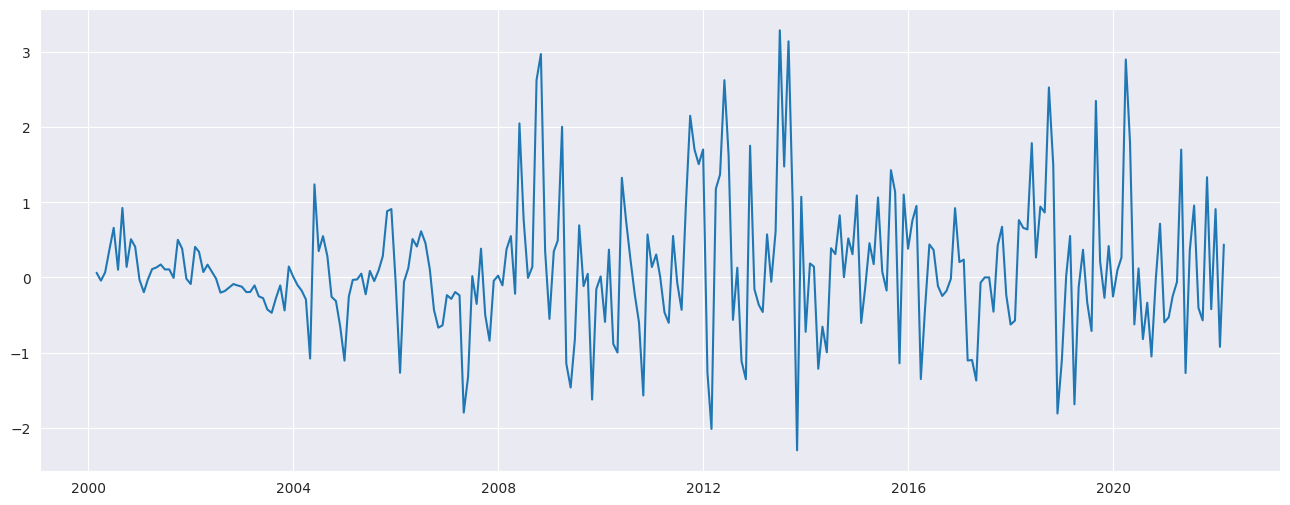

In [58]:
D_monthly_exchange_rate=monthly_exchange_rate.diff()
plt.plot(D_monthly_exchange_rate)


Text(0, 0.5, 'D12_D_monthly_exchange_rate (Rupee/Dollar)')

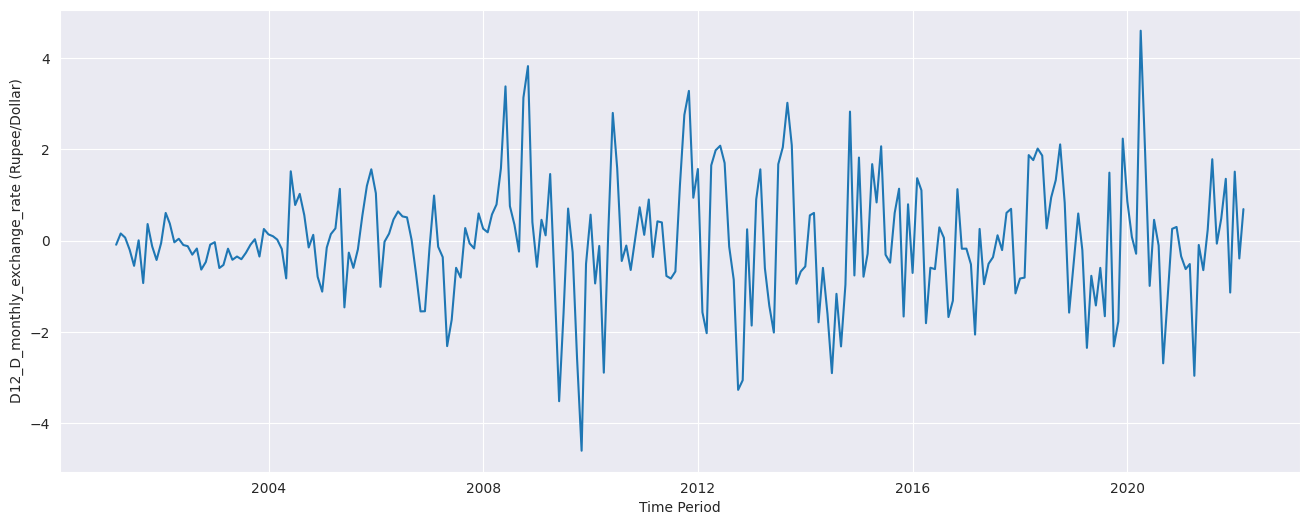

In [59]:
D12_D_monthly_exchange_rate=D_monthly_exchange_rate.diff(12)
plt.plot(D12_D_monthly_exchange_rate)
plt.xlabel("Time Period")
plt.ylabel("D12_D_monthly_exchange_rate (Rupee/Dollar)")

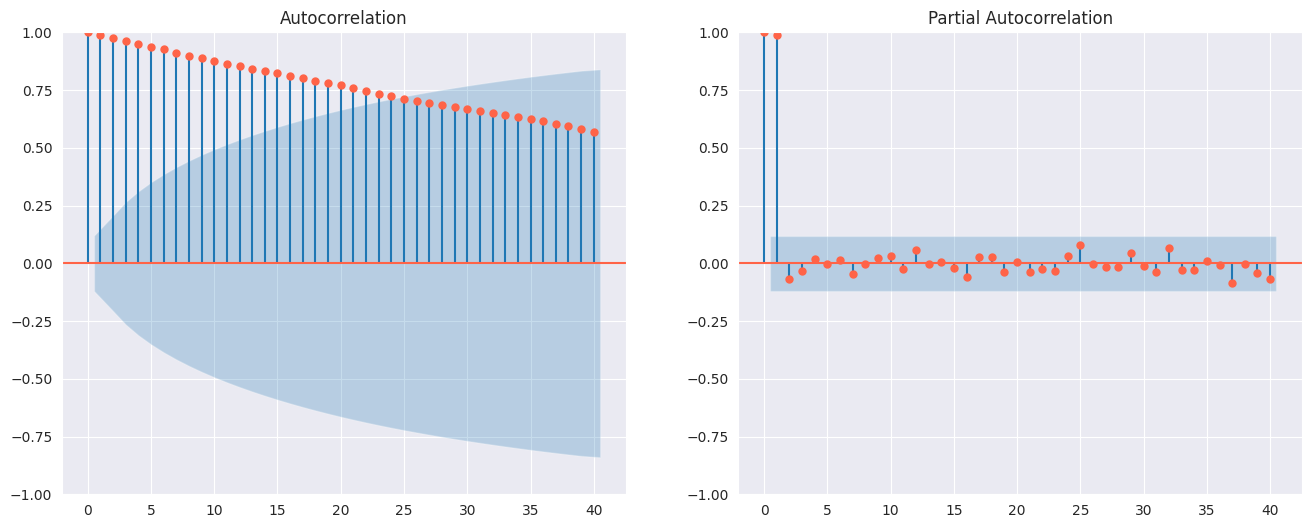

In [50]:
fig, axes = plt.subplots(1, 2)

fig = sm.graphics.tsa.plot_acf(monthly_exchange_rate, lags=40, ax=axes[0],color= 'tomato')
fig = sm.graphics.tsa.plot_pacf(monthly_exchange_rate, lags=40, ax=axes[1],color= 'tomato')

In [51]:
adftest = adfuller(monthly_exchange_rate,autolag="AIC")
print('ADF Statistic: %f' % adftest[0])
print('p-value: %f' % adftest[1])

ADF Statistic: -0.167371
p-value: 0.942301


In [69]:
adftest = adfuller(D12_D_monthly_exchange_rate.dropna(),autolag="AIC")
print('ADF Statistic: %f' % adftest[0])
print('p-value: %f' % adftest[1])

ADF Statistic: -7.322054
p-value: 0.000000


In [70]:
kpsstest = kpss(monthly_exchange_rate, regression="c", nlags="auto")
print('KPSS Statistic: %f' % kpsstest[0])
print('p-value: %f' % kpsstest[1])

KPSS Statistic: 2.170606
p-value: 0.010000


In [71]:
kpsstest = kpss(D12_D_monthly_exchange_rate.dropna(), regression="c", nlags="auto")
print('KPSS Statistic: %f' % kpsstest[0])
print('p-value: %f' % kpsstest[1])

KPSS Statistic: 0.023637
p-value: 0.100000


In [72]:
monthly_exchange_rate.describe()

,exchange_rate
count,266.000000
mean,54.852830
std,11.187489
min,39.264008
25%,45.490256
50%,48.734013
75%,65.072161
max,76.251628


In [73]:
stepwise_fit = pm.auto_arima(monthly_exchange_rate, start_p = 1, start_q = 1,
                          max_p = 1, max_q = 1, m = 12,
                          start_P = 1,max_P = 3,start_Q = 0,max_Q = 1, seasonal = True,
                          d = 1, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=758.349, Time=0.25 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=853.338, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=758.148, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.85 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=824.438, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=714.283, Time=0.37 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=707.534, Time=0.64 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=10.17 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=4.07 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=724.269, Time=0.61 sec
 ARIMA(1,1,1)(3,1,0)[12]             : AIC=707.935, Time=1.02 sec
 ARIMA(0,1,1)(3,1,0)[12]             : AIC=705.947, Time=0.76 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=712.164, Time=0.41 sec
 ARIMA(0,1,1)(3,1,1)[12]             : AIC=inf, Time=13.76 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  266
Model:             SARIMAX(0, 1, 1)x(3, 1, [], 12)   Log Likelihood                -347.973
Date:                             Thu, 26 Dec 2024   AIC                            705.947
Time:                                     14:11:00   BIC                            723.614
Sample:                                 01-31-2000   HQIC                           713.055
                                      - 02-28-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2894      0.059      4.900      0.000       0.174       0.405
ar.S.L12      -0.7933      0.063    -12.583      0.000      -0.917      -0.670
ar.S.L24      -0.5639      0.073     -7.720      0.000      -0.707      -0.421
ar.S.L36      -0.1914      0.065     -2.930      0.003      -0.319      -0.063
sigma2         0.8821      0.062     14.339      0.000       0.762       1.003
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                27.20
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               4.81   Skew:                             0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
type(stepwise_fit)

pmdarima.arima.arima.ARIMA

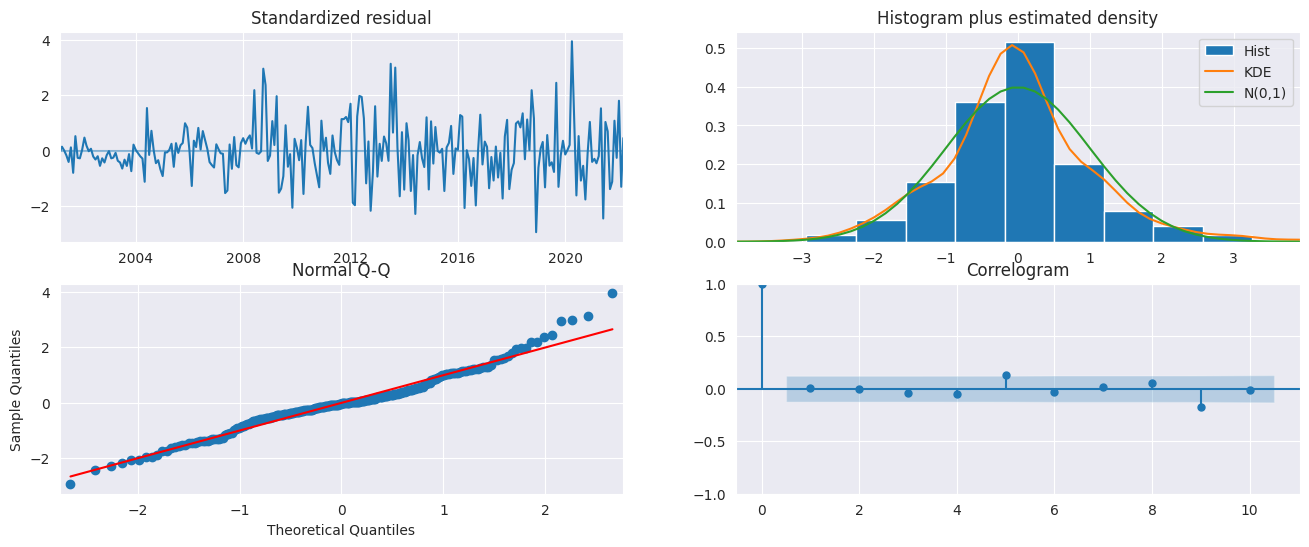

In [75]:
stepwise_fit.plot_diagnostics()
plt.show()

In [67]:
D_monthly_exchange_rate

,exchange_rate
Time_Period,
2000-01-31,NaN
2000-02-29,0.061571
2000-03-31,-0.043001
2000-04-30,0.067298
2000-05-31,0.375397
...,...
2021-10-31,1.333663
2021-11-30,-0.423467
2021-12-31,0.909272


In [68]:
D12_D_monthly_exchange_rate

,exchange_rate
Time_Period,
2000-01-31,NaN
2000-02-29,NaN
2000-03-31,NaN
2000-04-30,NaN
2000-05-31,NaN
...,...
2021-10-31,1.350388
2021-11-30,-1.138518
2021-12-31,1.507171


In [60]:
monthly_exchange_rate_df=pd.DataFrame({'monthly_exchange_rate':monthly_exchange_rate})

In [61]:
monthly_exchange_rate_df.describe()

,monthly_exchange_rate
count,266.000000
mean,54.852830
std,11.187489
min,39.264008
25%,45.490256
50%,48.734013
75%,65.072161
max,76.251628


In [62]:
monthly_exchange_rate_df['monthly_exchange_rate'].index = pd.date_range("2000-01-31","2022-02-28 ",freq='M')

In [63]:
t = np.arange(1,267)
monthly_exchange_rate_df.insert(1,"time",t)

In [64]:
monthly_exchange_rate

,exchange_rate
Time_Period,
2000-01-31,43.559093
2000-02-29,43.620664
2000-03-31,43.577663
2000-04-30,43.644961
2000-05-31,44.020358
...,...
2021-10-31,74.891071
2021-11-30,74.467604
2021-12-31,75.376876


In [65]:
D12_D_monthly_exchange_rate.dropna()

,exchange_rate
Time_Period,
2001-02-28,-0.091833
2001-03-31,0.153929
2001-04-30,0.064692
2001-05-31,-0.203533
2001-06-30,-0.554147
...,...
2021-10-31,1.350388
2021-11-30,-1.138518
2021-12-31,1.507171


# **Model Selection**

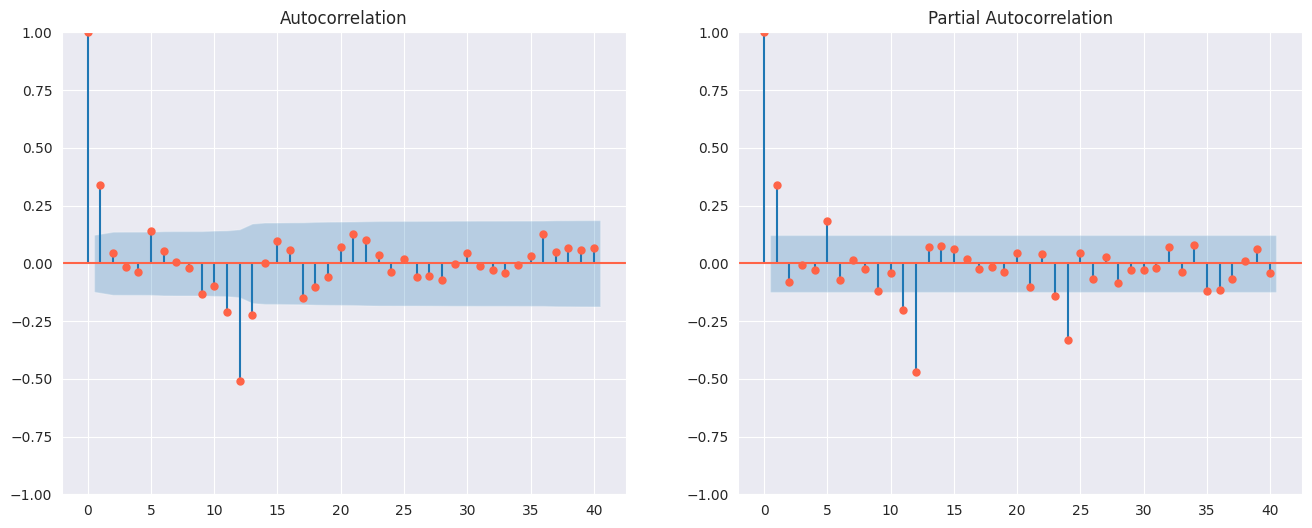

In [76]:
fig, axes = plt.subplots(1, 2)

fig = sm.graphics.tsa.plot_acf(D12_D_monthly_exchange_rate.dropna(), lags=40, ax=axes[0],color= 'tomato')
fig = sm.graphics.tsa.plot_pacf(D12_D_monthly_exchange_rate.dropna(), lags=40, ax=axes[1],color= 'tomato')

In [80]:
# Split data into train / test sets

size = int(len(monthly_exchange_rate)*0.9)
train, test = monthly_exchange_rate.iloc[:size], monthly_exchange_rate.iloc[size:]

In [81]:
test = test.drop(columns=['Time', 'D_exchange_rate','ln_exchangerate','D.ln_exchangerate','D.7.D_exchange_rate'])



In [85]:
test

,exchange_rate
Time_Period,
2019-12-31,71.194774
2020-01-31,71.288642
2020-02-29,71.551451
2020-03-31,74.453001
2020-04-30,76.251628
2020-05-31,75.626256
2020-06-30,75.745868
2020-07-31,74.924244
2020-08-31,74.586895


In [84]:
test.head()

,exchange_rate
Time_Period,
2019-12-31,71.194774
2020-01-31,71.288642
2020-02-29,71.551451
2020-03-31,74.453001
2020-04-30,76.251628


In [86]:
D_train=train.diff()
D12_D_train=D_train.diff(12)
D_test=test.diff()
D12_D_test=D_test.diff(12)

In [87]:
D12_D_test.dropna()

,exchange_rate
Time_Period,
2021-01-31,-0.625066
2021-02-28,-0.514267
2021-03-31,-2.960189
2021-04-30,-0.097036
2021-05-31,-0.648142
2021-06-30,0.236952
2021-07-31,1.778934
2021-08-31,-0.068250
2021-09-30,0.481070


In [89]:
from sklearn.metrics import mean_absolute_error

In [94]:

# Fit a SARIMAX on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model1 = SARIMAX(train,
                order = (1,1, 1),
                seasonal_order =(3, 1, 1, 12))

result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                      exchange_rate   No. Observations:                  239
Model:             SARIMAX(1, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -290.920
Date:                            Thu, 26 Dec 2024   AIC                            595.841
Time:                                    14:17:05   BIC                            619.785
Sample:                                01-31-2000   HQIC                           605.504
                                     - 11-30-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0225      0.147      0.153      0.879      -0.267       0.312
ma.L1          0.2919      0.153      1.906      0.057      -0.008       0.592
ar.S.L12      -0.0392      0.089     -0.442      0.658      -0.213       0.135
ar.S.L24      -0.0019      0.084     -0.023      0.982      -0.167       0.163
ar.S.L36       0.1498      0.087      1.716      0.086      -0.021       0.321
ma.S.L12      -0.9980      3.149     -0.317      0.751      -7.170       5.174
sigma2         0.6608      2.048      0.323      0.747      -3.354       4.675
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                32.15
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               4.03   Skew:                             0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

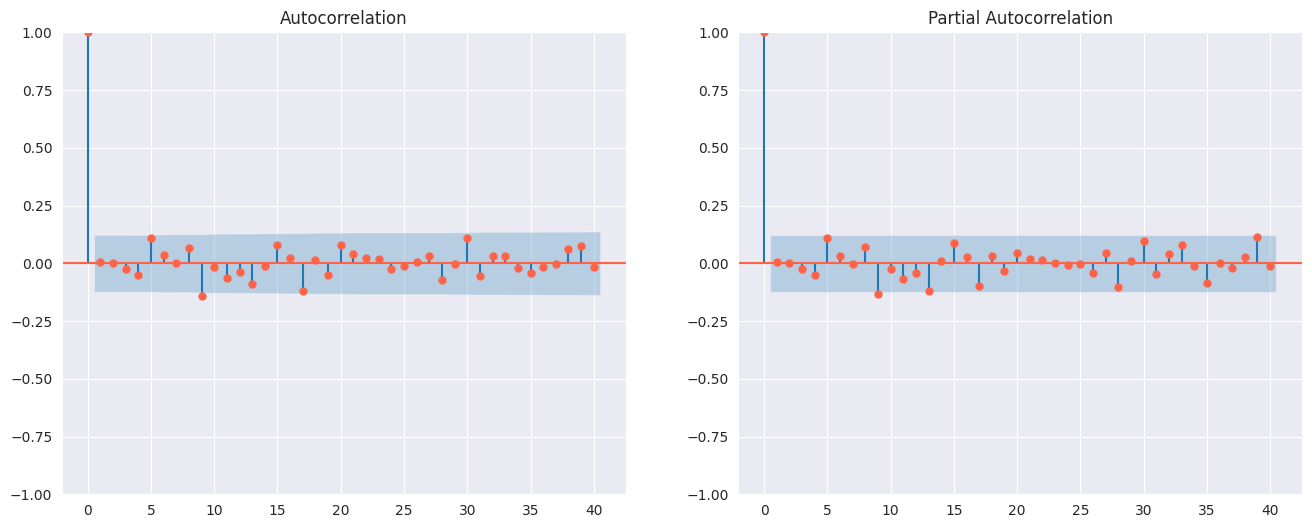

In [103]:
fig, axes = plt.subplots(1, 2)

fig = sm.graphics.tsa.plot_acf(residuals, lags=40, ax=axes[0],color= 'tomato',alpha = 0.05)
fig = sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=axes[1],color= 'tomato',alpha = 0.05)

<Axes: xlabel='Time_Period'>

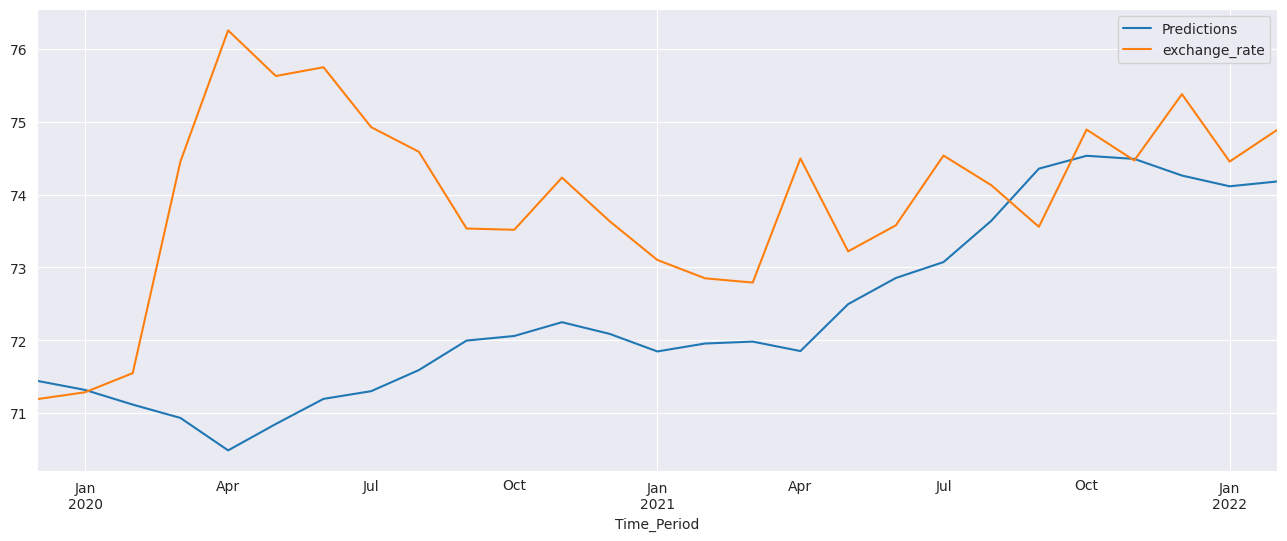

In [102]:
# Predictions of ARIMA Model against the test set


start = len(train)
end = len(train) + len(test) - 1

# Predictions against the test set
predictions = result1.predict(start, end,
                             typ = 'levels').rename("Predictions")
error_sarima = np.subtract(test,predictions)
# plot predictions and actual values
predictions.plot(legend = True)
test.plot(legend = True)

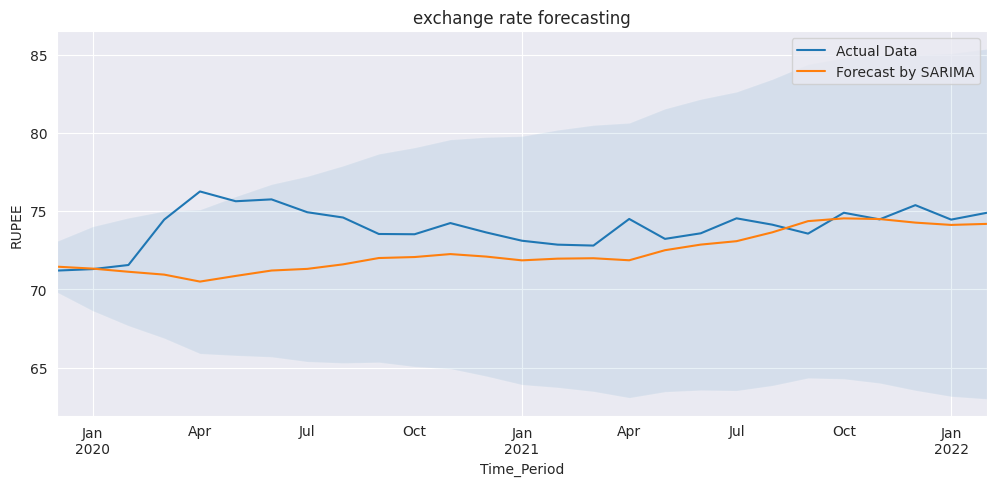

In [104]:
# In-sample one-step-ahead predictions
predict = result1.get_prediction(start='2019-12-31',end = '2022-02-28')
predict_ci = predict.conf_int( alpha=0.05)
# Graph
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='exchange rate forecasting', xlabel='Date', ylabel='RUPEE')


test.plot(figsize = (12, 5),ax=ax, label='Actual Data',legend = True)

# Plot predictions
predict.predicted_mean.loc['2019-12-31':].plot(figsize = (12, 5),ax=ax, label='Forecast by SARIMA',legend = True)
ci = predict_ci.loc['2019-12-31':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], alpha=0.1)

In [105]:

from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

rmse(test, predictions)


mean_squared_error(test, predictions)

5.1176478349730585

**diagonostic**D12_D_

In [92]:
modsarima = sm.tsa.statespace.SARIMAX(D12_D_monthly_exchange_rate.dropna(), order=(1,0,1),seasonal_order= (3,0,1,12))
resarima = modsarima.fit(disp=False)
print(resarima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      exchange_rate   No. Observations:                  253
Model:             SARIMAX(1, 0, 1)x(3, 0, 1, 12)   Log Likelihood                -335.638
Date:                            Thu, 26 Dec 2024   AIC                            685.276
Time:                                    14:15:26   BIC                            710.010
Sample:                                02-28-2001   HQIC                           695.227
                                     - 02-28-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0134      0.176     -0.076      0.940      -0.359       0.332
ma.L1          0.2822      0.180   

In [95]:
print(resarima.test_normality(method='jarquebera'))

[[3.18539796e+01 1.21058761e-07 4.86816999e-01 4.44005494e+00]]


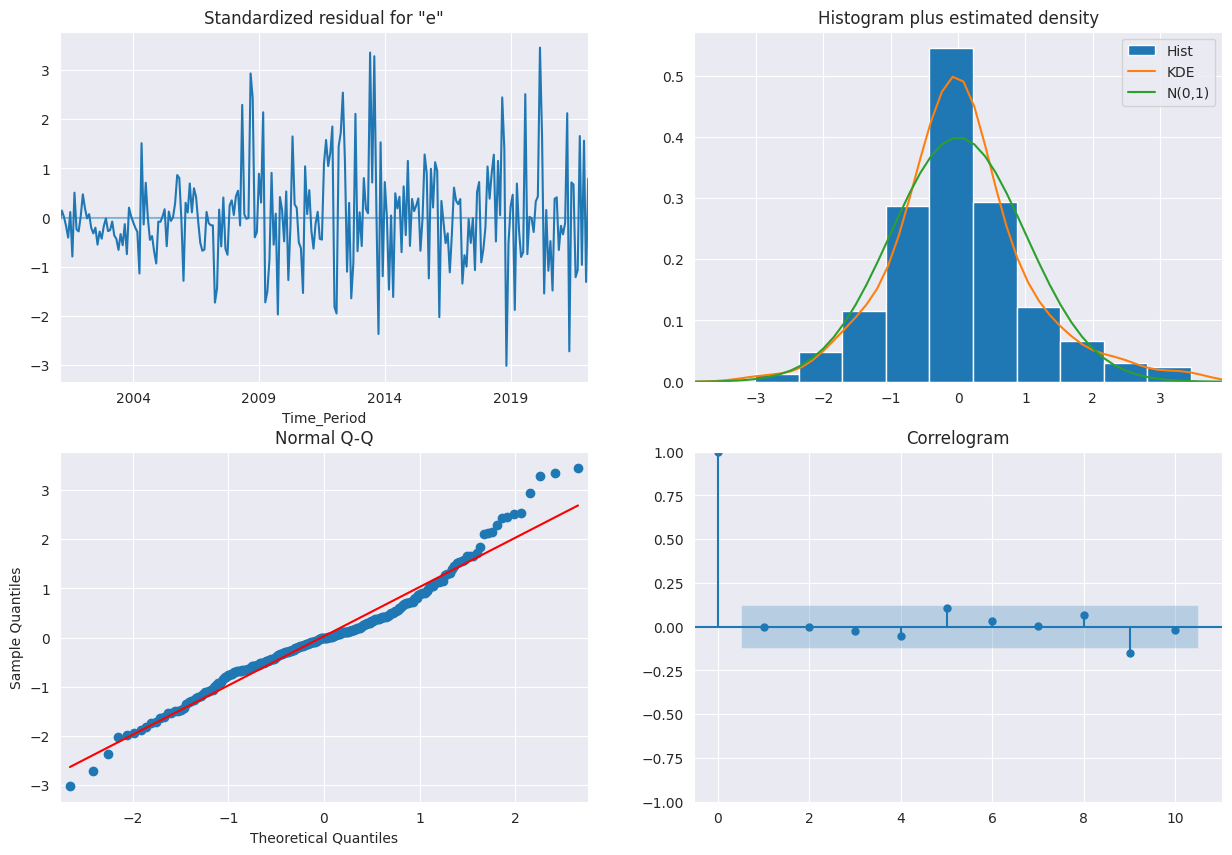

In [97]:
resarima.plot_diagnostics(figsize=(15,10))
plt.show()

In [109]:
# start_date = "2018-10-31"
# end_date = "2022-02-28"

# model_s31_arima_21 = sm.tsa.statespace.SARIMAX(D12_D_train.dropna(), order=(0,0,1),seasonal_order= (3,0,1,12))
# results_s31_arima_21 = model_s31_arima_21.fit(disp=False)
# df_pred_s31_arima_21 = results_s31_arima_21.predict(start = start_date, end = end_date)
# df_pred_s31_arima_21 = pd.DataFrame(df_pred_s31_arima_21)
# mse_s31_arima_21 = mean_squared_error(D12_D_test.dropna(), df_pred_s31_arima_21 )
# mae_s31_arima_21 = mean_absolute_error(D12_D_test.dropna(), df_pred_s31_arima_21 )
# print('AIC s31_arima_21: %f' % results_s31_arima_21 .aic)
# print('MAE s31_arima_21: %f' % mae_s31_arima_21)
# print('MSE s31_arima_21: %f' % mse_s31_arima_21)


In [107]:
residuals = pd.Series(resarima.resid)

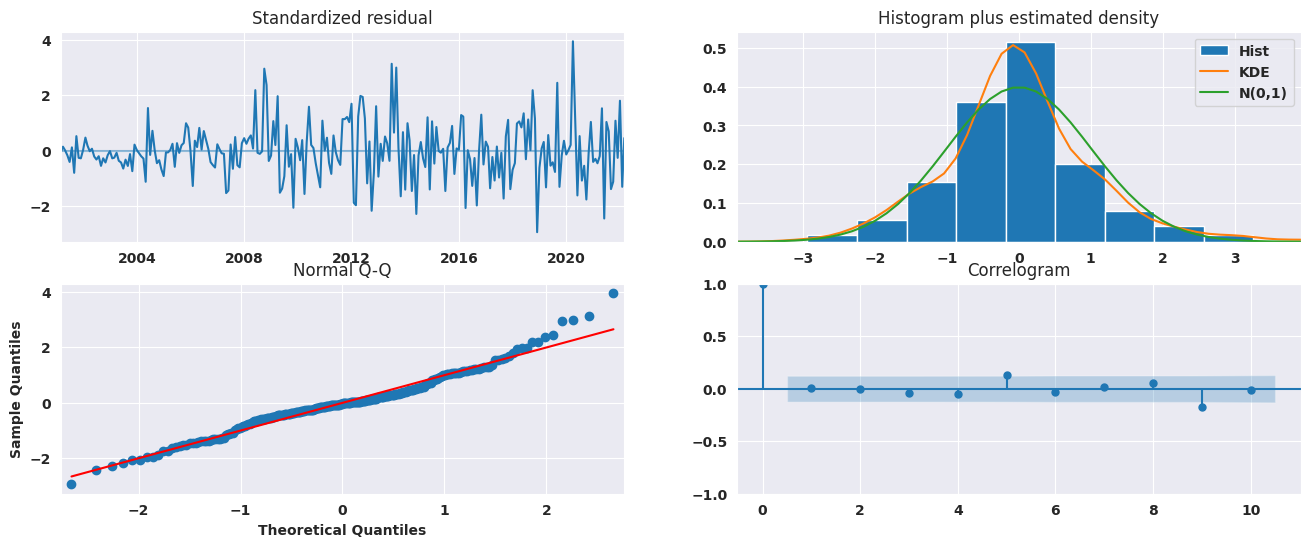

In [111]:
stepwise_fit.plot_diagnostics()
plt.show()

In [108]:
np.mean(residuals**2)

0.7837443354243202

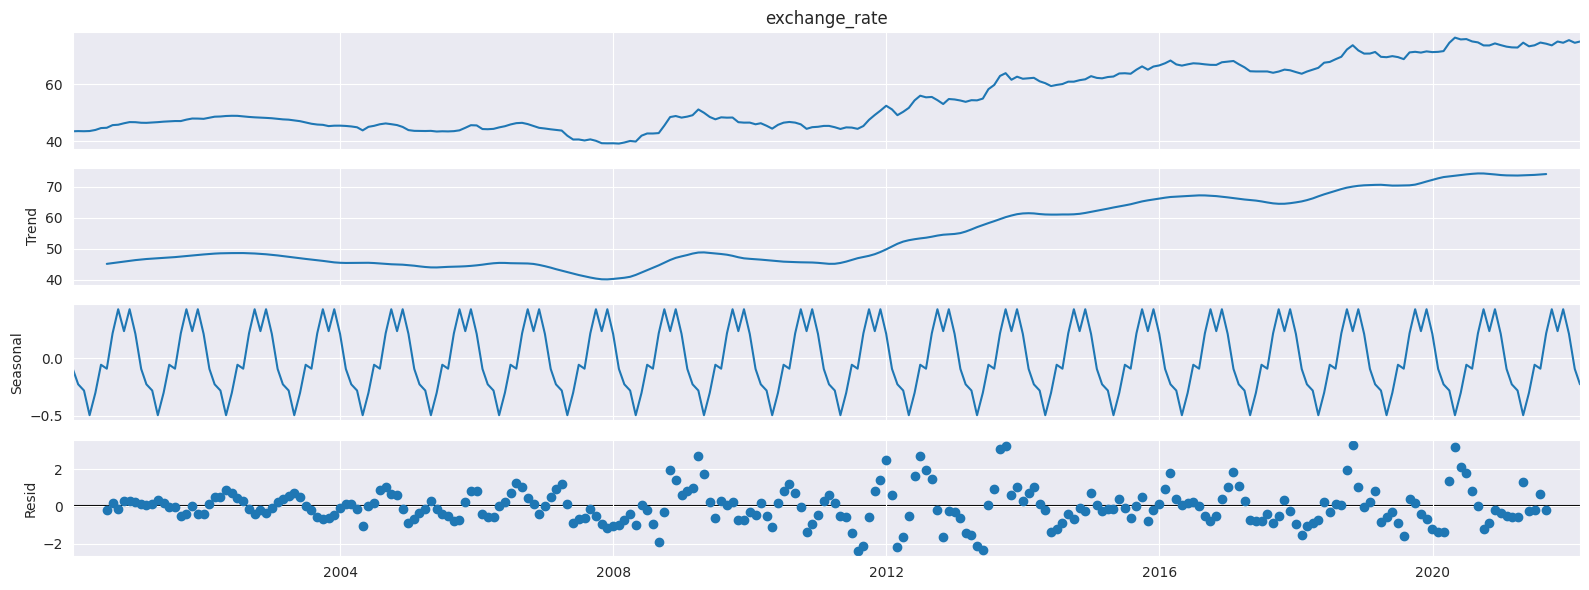

In [110]:
# ETS Decomposition
result = seasonal_decompose(monthly_exchange_rate,
                            model ='additive')

# ETS plot
result.plot()
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.show()

In [98]:
train

,exchange_rate
Time_Period,
2000-01-31,43.559093
2000-02-29,43.620664
2000-03-31,43.577663
2000-04-30,43.644961
2000-05-31,44.020358
...,...
2019-07-31,68.740805
2019-08-31,71.090694
2019-09-30,71.303417


In [112]:
test

,exchange_rate
Time_Period,
2019-12-31,71.194774
2020-01-31,71.288642
2020-02-29,71.551451
2020-03-31,74.453001
2020-04-30,76.251628
2020-05-31,75.626256
2020-06-30,75.745868
2020-07-31,74.924244
2020-08-31,74.586895


**Exponential Smoothing**

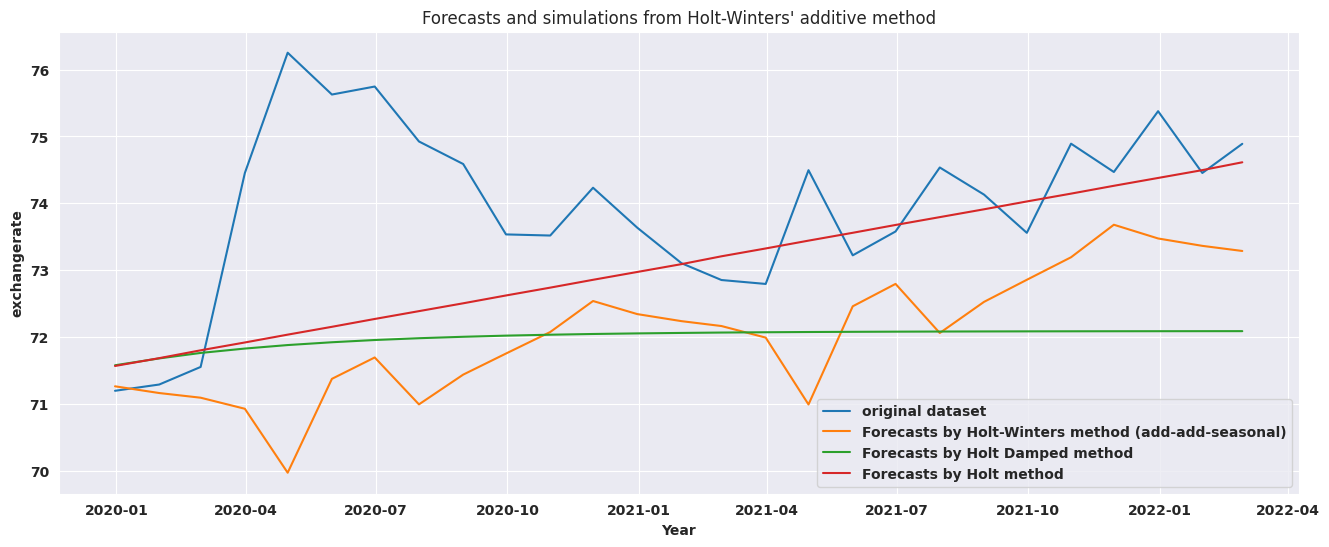

,Additive
$\alpha$,0.995000
$\beta$,0.213214
$\phi$,NaN
$\gamma$,0.000100
$l_0$,0.492211
$b_0$,0.000002
SSE,202.013936


In [114]:
fitExponentialSmoothing = ExponentialSmoothing(
    train,
    seasonal_periods=12,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

fitHolt_Damp = Holt(train, damped_trend=True, initialization_method="estimated").fit()
HES_optimal = Holt(train,initialization_method='estimated').fit()


error_ExpSm = np.subtract(test,fitExponentialSmoothing.forecast(27))
error_HES = np.subtract(test,HES_optimal.forecast(27))
error_DHES = np.subtract(test,fitHolt_Damp.forecast(27))

resultsexpss = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
resultsexpss["Additive"] = [fitExponentialSmoothing.params[p] for p in params] + [fitExponentialSmoothing.sse]


plt.plot( test,label="original dataset")
plt.plot(fitExponentialSmoothing.forecast(27),label="Forecasts by Holt-Winters method (add-add-seasonal)")
plt.plot(fitHolt_Damp.forecast(27),label="Forecasts by Holt Damped method")
plt.plot(HES_optimal.forecast(27),label="Forecasts by Holt method")
plt.title("Forecasts and simulations from Holt-Winters' additive method")
plt.xlabel("Year")
plt.ylabel("exchangerate")
plt.legend()
plt.show()
resultsexpss

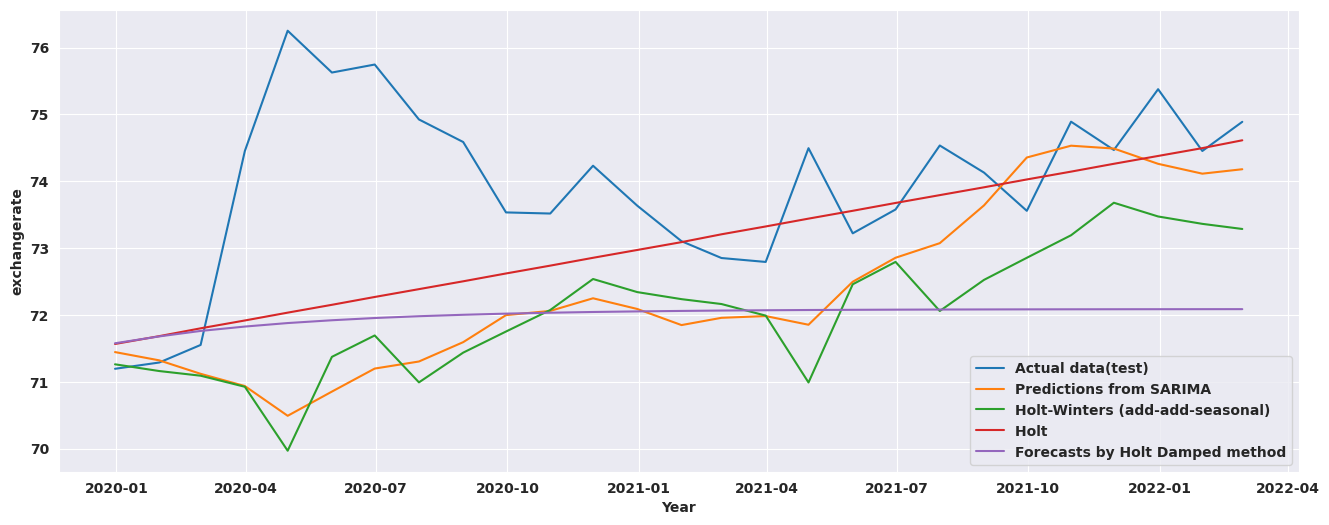

In [115]:
# plot for test data using all forecasting method
plt.plot(test,label='Actual data(test)')
plt.plot(predictions,label='Predictions from SARIMA')

plt.plot(fitExponentialSmoothing.forecast(27),label="Holt-Winters (add-add-seasonal)")
plt.plot(HES_optimal.forecast(27),label="Holt ")
plt.plot(fitHolt_Damp.forecast(27),label="Forecasts by Holt Damped method")
plt.xlabel("Year")
plt.ylabel("exchangerate")
plt.legend()

In [116]:
np.mean(error_sarima**2)

5.1176478349730585

In [117]:
np.mean(error_ExpSm**2)

5.825045700684956

In [118]:
np.mean(error_HES**2)

2.497137668071284

In [119]:
np.mean(error_DHES**2)

5.312657914310498

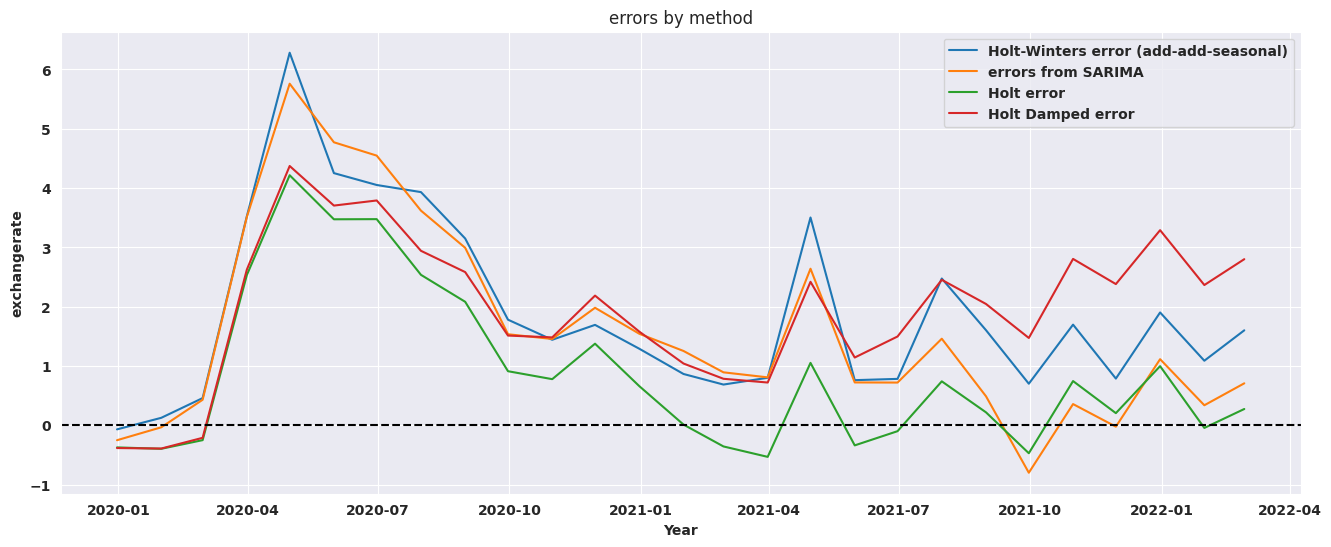

In [120]:
# Errors from all the models

plt.plot(error_ExpSm,label="Holt-Winters error (add-add-seasonal)")
plt.plot(error_sarima,label='errors from SARIMA')
plt.plot(error_HES,label="Holt error ")
plt.plot(error_DHES,label="Holt Damped error ")
plt.title("errors by method")
plt.xlabel("Year")
plt.ylabel("exchangerate")
plt.legend()
plt.axhline(y =0, color = 'black', linestyle = 'dashed')
plt.show()


**Full Data Training**

<Axes: xlabel='Time_Period'>

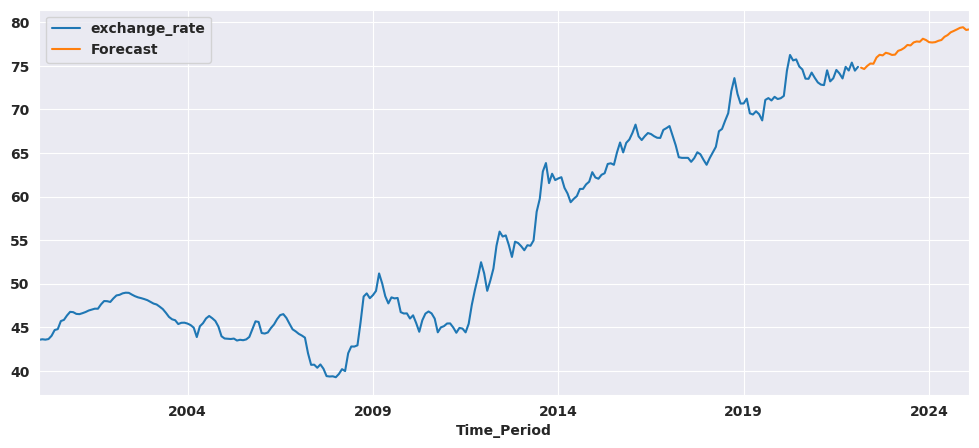

In [121]:
# Train the model on the full dataset
model = model = SARIMAX(monthly_exchange_rate,
                        order = (2, 1, 1),
                        seasonal_order =(3, 1, 1, 12))
result = model.fit()

# Forecast for the next 3 years
forecast = result.predict(start = len(monthly_exchange_rate),
                          end = (len(monthly_exchange_rate)-1) + 3 * 12,
                          typ = 'levels').rename('Forecast')

# Plot the forecast values
monthly_exchange_rate.plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

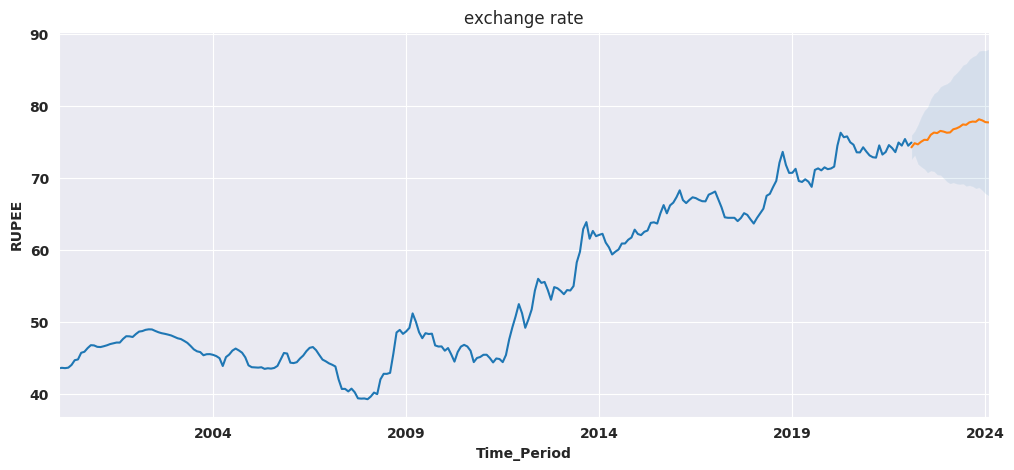

In [122]:
# In-sample one-step-ahead predictions
predict = result.get_prediction(start='2022-02-28',end = '2024-02-28')
predict_ci = predict.conf_int()
# Graph
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='exchange rate', xlabel='Date', ylabel='RUPEE')

# Plot data points
monthly_exchange_rate.plot(figsize = (12, 5),ax=ax, label='Observed')

# Plot predictions
predict.predicted_mean.loc['2022-02-28':].plot(figsize = (12, 5),ax=ax, label='One-step-ahead forecast')
ci = predict_ci.loc['2022-02-28':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], alpha=0.1)